# Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.


In [1]:
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
from moviepy.editor import VideoFileClip

%matplotlib inline

In [2]:
chessboard_image_paths = glob.glob('./camera_cal/calibration*.jpg')

In [3]:
print(chessboard_image_paths)

['./camera_cal/calibration15.jpg', './camera_cal/calibration5.jpg', './camera_cal/calibration11.jpg', './camera_cal/calibration13.jpg', './camera_cal/calibration7.jpg', './camera_cal/calibration4.jpg', './camera_cal/calibration1.jpg', './camera_cal/calibration6.jpg', './camera_cal/calibration17.jpg', './camera_cal/calibration18.jpg', './camera_cal/calibration16.jpg', './camera_cal/calibration12.jpg', './camera_cal/calibration14.jpg', './camera_cal/calibration3.jpg', './camera_cal/calibration10.jpg', './camera_cal/calibration2.jpg', './camera_cal/calibration8.jpg', './camera_cal/calibration20.jpg', './camera_cal/calibration9.jpg', './camera_cal/calibration19.jpg']


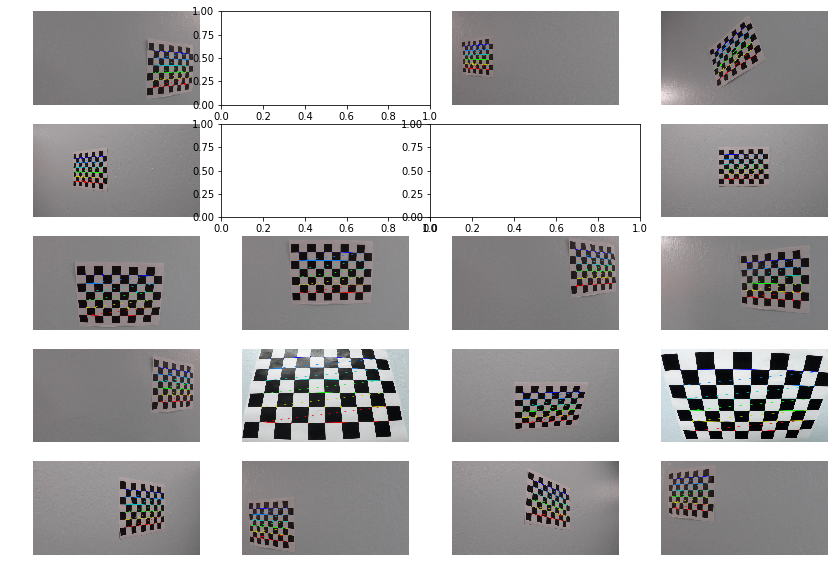

In [4]:
object_point = np.zeros((6*9,3), np.float32)
object_point[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

object_points = []
image_points = []

fig, axs = plt.subplots(5, 4, figsize=(15, 10))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

for i in range(len(chessboard_image_paths)):
    chessboard_image_path = chessboard_image_paths[i]
    chessboard_image = cv2.imread(chessboard_image_path)
    gray_chessboard_image = cv2.cvtColor(chessboard_image, cv2.COLOR_BGR2GRAY)
    ret_value, corners = cv2.findChessboardCorners(gray_chessboard_image, (9, 6))

    if ret_value == True:
        object_points.append(object_point)
        image_points.append(cv2.cornerSubPix(gray_chessboard_image, corners, (11,11), (-1,-1), criteria))
        axs[i].axis('off')
        axs[i].imshow(cv2.drawChessboardCorners(chessboard_image, (9,6), corners, ret_value))

In [5]:
def plot_two_images(first_image_title, first_image, second_image_title, second_image):
    fig, axs = plt.subplots(1, 2, figsize=(20, 20))
    fig.subplots_adjust(hspace = .2, wspace=.05)
    axs = axs.ravel()
    if len(first_image.shape) == 2:
        axs[0].imshow(first_image, cmap="gray")
    else:
        axs[0].imshow(first_image)
    axs[0].set_title(first_image_title, fontsize=30)
    
    if len(second_image.shape) == 2:
        axs[1].imshow(second_image, cmap="gray")
    else:
        axs[1].imshow(second_image)
        
    axs[1].set_title(second_image_title, fontsize=30)

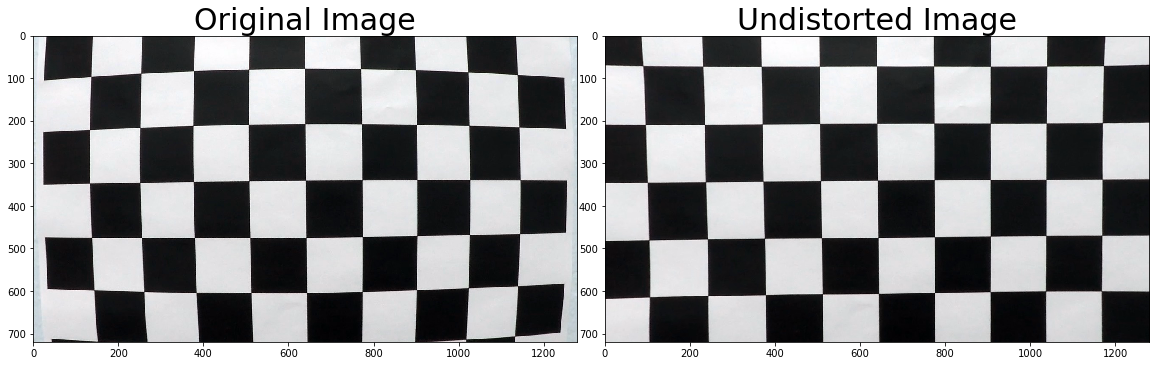

In [6]:
chessboard_image = cv2.imread('./camera_cal/calibration1.jpg')
image_size = (chessboard_image.shape[1], chessboard_image.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(object_points, image_points, image_size, None, None)
chessboard_image_undistorted = cv2.undistort(chessboard_image, mtx, dist, None, mtx)
cv2.imwrite("./output_images/undistorted.jpg", chessboard_image_undistorted)

plot_two_images('Original Image', chessboard_image, 'Undistorted Image', chessboard_image_undistorted)

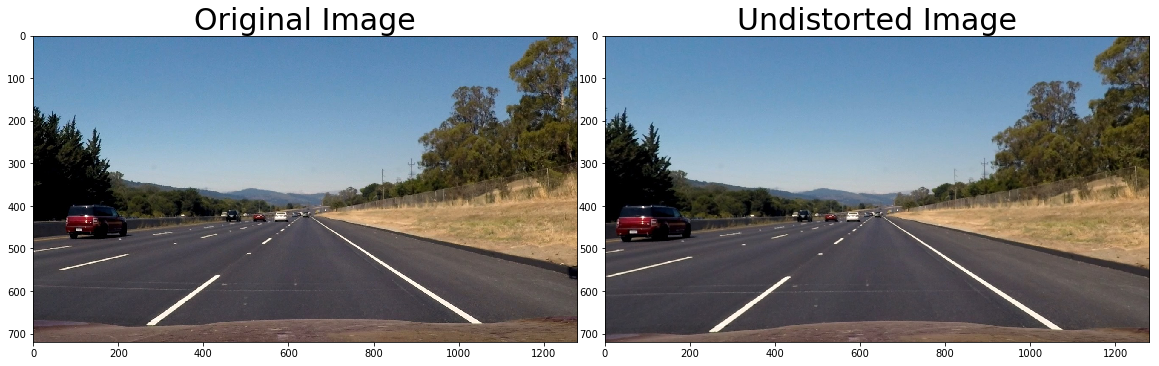

In [7]:
example_image = cv2.imread('./test_images/straight_lines2.jpg')
example_image = cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB)

def undistort(image):
    return cv2.undistort(image, mtx, dist, None, mtx)

example_image_undistorted = undistort(example_image)
cv2.imwrite("./output_images/distortion-corrected.jpg",
            cv2.cvtColor(example_image_undistorted, cv2.COLOR_RGB2BGR))
plot_two_images('Original Image', example_image, 'Undistorted Image', example_image_undistorted)

True

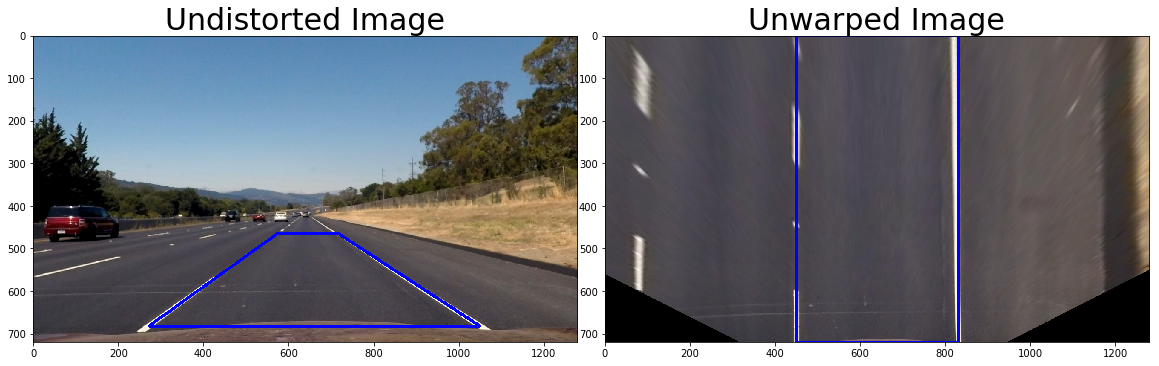

In [8]:
def unwarp(image, src, dst):
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    warped = cv2.warpPerspective(image, M, (image.shape[:2][1], image.shape[:2][0]), flags=cv2.INTER_LINEAR)
    return warped, M, Minv

height, width = example_image_undistorted.shape[:2]
source_points = [(575, 464), (272, 682), (1049, 682), (715, 464)]
destination_points = [(450, 0), (450, height), (width - 450, height), (width - 450, 0)]

example_image_undistorted_unwarp, M, Minv = unwarp(
    example_image_undistorted,
    np.float32(source_points),
    np.float32(destination_points))

plot_two_images('Undistorted Image',
                cv2.polylines(example_image_undistorted.copy(),
                              pts=np.array([source_points]),
                              isClosed=True,
                              thickness=5, color=[0, 0, 255]) ,
                'Unwarped Image',
                cv2.polylines(example_image_undistorted_unwarp.copy(),
                              pts=np.array([destination_points]),
                              isClosed=True,
                              thickness=5, color=[0, 0, 255]))
cv2.imwrite("./output_images/warp1.jpg", cv2.cvtColor(cv2.polylines(example_image_undistorted.copy(),
                              pts=np.array([source_points]),
                              isClosed=True,
                              thickness=5, color=[0, 0, 255]), cv2.COLOR_RGB2BGR))
cv2.imwrite("./output_images/warp2.jpg", cv2.polylines(example_image_undistorted_unwarp.copy(),
                              pts=np.array([destination_points]),
                              isClosed=True,
                              thickness=5, color=[0, 0, 255]))

Text(0.5,1,'HLS L')

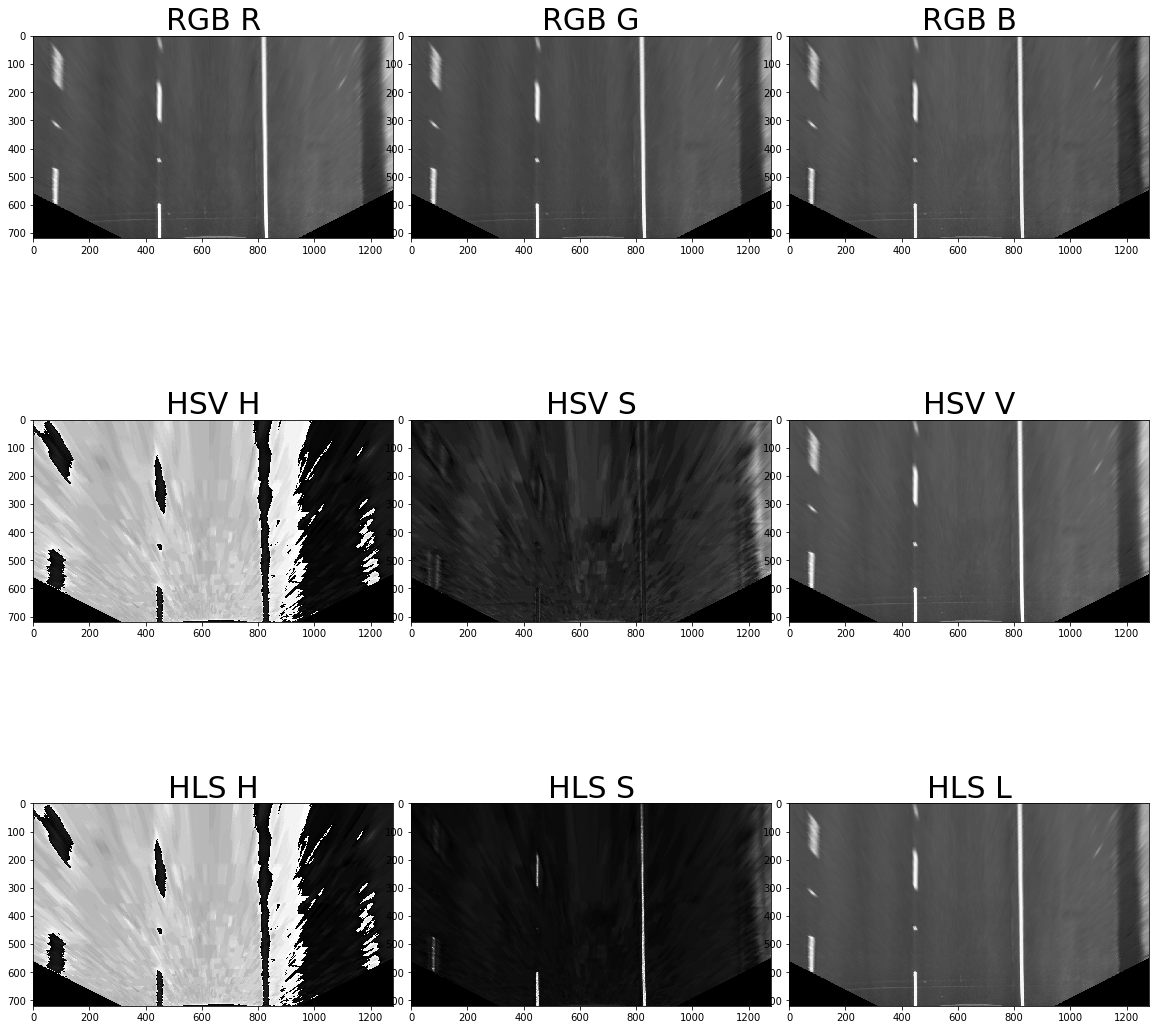

In [9]:
example_image_undistorted_unwarp_r = example_image_undistorted_unwarp[:,:,0]
example_image_undistorted_unwarp_g = example_image_undistorted_unwarp[:,:,1]
example_image_undistorted_unwarp_b = example_image_undistorted_unwarp[:,:,2]
example_image_undistorted_unwarp_hsv = cv2.cvtColor(example_image_undistorted_unwarp, cv2.COLOR_RGB2HSV)
example_image_undistorted_unwarp_h = example_image_undistorted_unwarp_hsv[:,:,0]
example_image_undistorted_unwarp_s = example_image_undistorted_unwarp_hsv[:,:,1]
example_image_undistorted_unwarp_v = example_image_undistorted_unwarp_hsv[:,:,2]
example_image_undistorted_unwarp_hls = cv2.cvtColor(example_image_undistorted_unwarp, cv2.COLOR_RGB2HLS)
example_image_undistorted_unwarp_hls_h = example_image_undistorted_unwarp_hls[:,:,0]
example_image_undistorted_unwarp_hls_l = example_image_undistorted_unwarp_hls[:,:,1]
example_image_undistorted_unwarp_hls_s = example_image_undistorted_unwarp_hls[:,:,2]

fig, axs = plt.subplots(3, 3, figsize=(20, 20))
fig.subplots_adjust(hspace = .2, wspace=.05)
axs = axs.ravel()
axs[0].imshow(example_image_undistorted_unwarp_r, cmap='gray')
axs[0].set_title("RGB R", fontsize=30)
axs[1].imshow(example_image_undistorted_unwarp_g, cmap='gray')
axs[1].set_title("RGB G", fontsize=30)
axs[2].imshow(example_image_undistorted_unwarp_b, cmap='gray')
axs[2].set_title("RGB B", fontsize=30)

axs[3].imshow(example_image_undistorted_unwarp_h, cmap='gray')
axs[3].set_title("HSV H", fontsize=30)
axs[4].imshow(example_image_undistorted_unwarp_s, cmap='gray')
axs[4].set_title("HSV S", fontsize=30)
axs[5].imshow(example_image_undistorted_unwarp_v, cmap='gray')
axs[5].set_title("HSV V", fontsize=30)

axs[6].imshow(example_image_undistorted_unwarp_hls_h, cmap='gray')
axs[6].set_title("HLS H", fontsize=30)
axs[7].imshow(example_image_undistorted_unwarp_hls_s, cmap='gray')
axs[7].set_title("HLS S", fontsize=30)
axs[8].imshow(example_image_undistorted_unwarp_hls_l, cmap='gray')
axs[8].set_title("HLS L", fontsize=30)

./test_images/test2.jpg
./test_images/test4.jpg
./test_images/test5.jpg
./test_images/straight_lines1.jpg
./test_images/test1.jpg
./test_images/test6.jpg
./test_images/straight_lines2.jpg
./test_images/test3.jpg


True

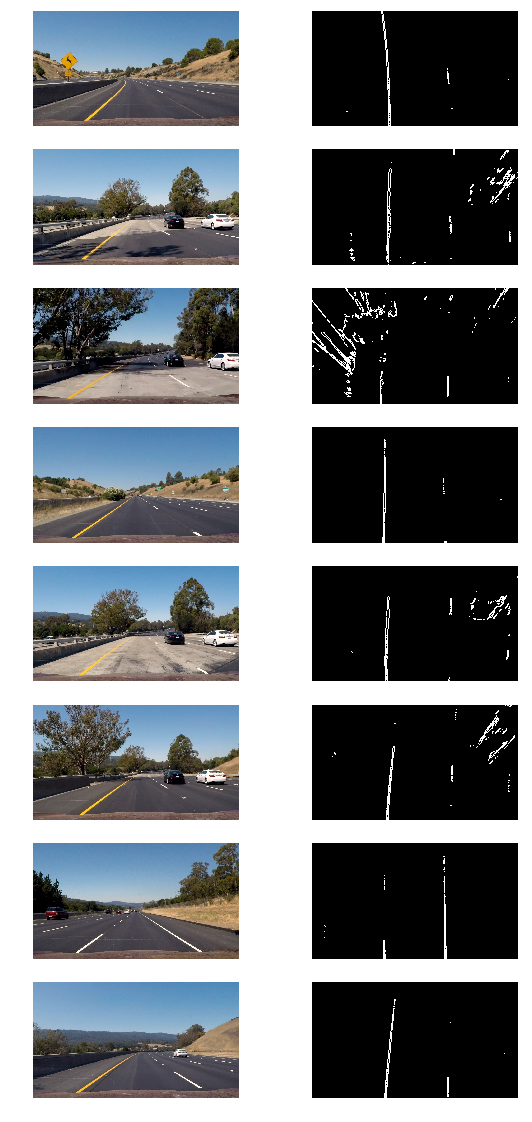

In [10]:
def process_image(image):
    image_undistorted = undistort(image)
    img_undistorted_unwarped, _, _ = unwarp(image_undistorted,
                                            np.float32(source_points),
                                            np.float32(destination_points))
    hls_s = cv2.cvtColor(img_undistorted_unwarped, cv2.COLOR_RGB2HLS)[:,:,2]
    hls_s = hls_s*(255/np.max(hls_s))
    color_mask = np.zeros_like(hls_s)
    color_mask[(hls_s > 180) & (hls_s < 255)] = 1

    gray_image = cv2.cvtColor(img_undistorted_unwarped, cv2.COLOR_RGB2GRAY)
    sobel_x = cv2.Sobel(color_mask, cv2.CV_64F, 1, 0, ksize=7)
    #sobel_y = cv2.Sobel(hls_s, cv2.CV_64F, 0, 1, ksize=7)
    #slope = np.absolute(sobel_y) / np.absolute(sobel_x)
    absolute_sobel_x = np.absolute(sobel_x)
    scaled_sobel = np.uint8(255*absolute_sobel_x/np.max(absolute_sobel_x))
    slope_mask = np.zeros_like(scaled_sobel)
    slope_mask[(scaled_sobel >= 10) & (scaled_sobel <= 1000)] = 1
    return slope_mask

test_image_paths = glob.glob('./test_images/*.jpg')

figure, axs = plt.subplots(len(test_image_paths), 2, figsize=(10, 20))
figure.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

for i, test_image_path in enumerate(test_image_paths):
    print(test_image_path)
    test_image = cv2.cvtColor(cv2.imread(test_image_path), cv2.COLOR_BGR2RGB)
    mask = process_image(test_image)
    axs[2*i].imshow(test_image)
    axs[2*i].axis('off')
    axs[2*i+1].imshow(mask, cmap='gray')
    axs[2*i+1].axis('off')

example_image_mask = process_image(
    cv2.cvtColor(cv2.imread("./test_images/straight_lines2.jpg"), cv2.COLOR_BGR2RGB))
cv2.imwrite("./output_images/binary.jpg", example_image_mask*255)

In [11]:
def polyfit(mask):
    histogram = np.sum(mask[int(mask.shape[0]/2):,:], axis=0)
    out_img = np.dstack((mask, mask, mask))*255
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    nwindows = 9
    window_height = np.int(mask.shape[0]/nwindows)
    nonzero = mask.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    leftx_current = leftx_base
    rightx_current = rightx_base
    margin = 80
    minpix = 40
    left_lane_inds = []
    right_lane_inds = []

    for window in range(nwindows):
        win_y_low = mask.shape[0] - (window+1)*window_height
        win_y_high = mask.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
                      (0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
                      (0,255,0), 2) 
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
                          (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
                           (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    return left_fit, right_fit, left_lane_inds, right_lane_inds, out_img, nonzerox, nonzeroy


(720, 1280)


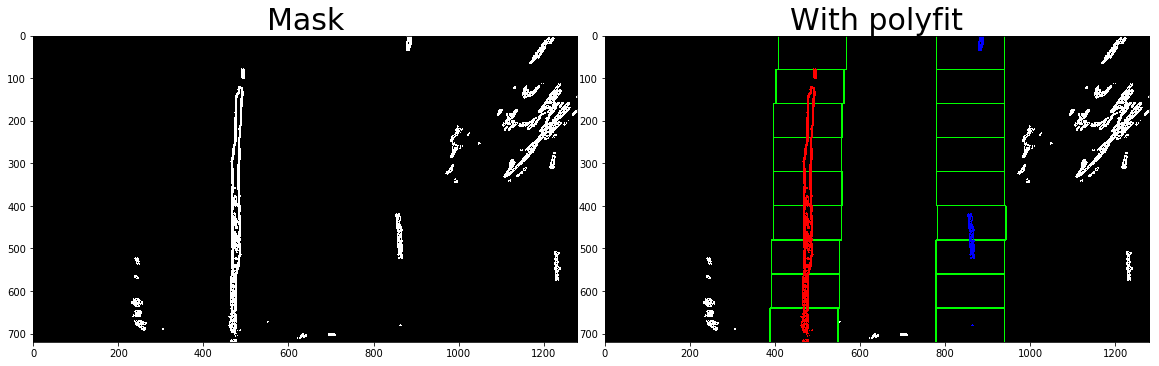

In [12]:
example_image1 = cv2.imread('./test_images/test4.jpg')
example_image1 = cv2.cvtColor(example_image1, cv2.COLOR_BGR2RGB)

mask = process_image(example_image1)
print(mask.shape)
left_fit, right_fit, left_lane_inds, right_lane_inds, out_img, nonzerox, nonzeroy = polyfit(mask)
ploty = np.linspace(0, mask.shape[0]-1, mask.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

plot_two_images("Mask", mask, "With polyfit", out_img)

In [13]:
def polyfit_with_frames(mask, left_fit_prev, right_fit_prev):
    # Assume you now have a new warped binary image 
     # from the next frame of video (also called "binary_warped")
    # It's now much easier to find line pixels!
    nonzero = mask.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 80
    
    if left_fit_prev is None or left_fit_prev is None:
        left_fit, right_fit, left_lane_inds, right_lane_inds, out_img, nonzerox, nonzeroy = polyfit(mask)
    else:
        left_lane_inds = ((nonzerox > (left_fit_prev[0]*(nonzeroy**2) + left_fit_prev[1]*nonzeroy +
            left_fit_prev[2] - margin)) & (nonzerox < (left_fit_prev[0]*(nonzeroy**2) +
            left_fit_prev[1]*nonzeroy + left_fit_prev[2] + margin))) 

        right_lane_inds = ((nonzerox > (right_fit_prev[0]*(nonzeroy**2) + right_fit_prev[1]*nonzeroy + 
            right_fit_prev[2] - margin)) & (nonzerox < (right_fit_prev[0]*(nonzeroy**2) + 
            right_fit_prev[1]*nonzeroy + right_fit_prev[2] + margin)))  

        # Again, extract left and right line pixel positions
        leftx = nonzerox[left_lane_inds]
        lefty = nonzeroy[left_lane_inds] 
        rightx = nonzerox[right_lane_inds]
        righty = nonzeroy[right_lane_inds]
        left_fit, right_fit = (None, None)
        # Fit a second order polynomial to each
        if len(leftx) != 0:
            left_fit = np.polyfit(lefty, leftx, 2)
        if len(rightx) != 0:
            right_fit = np.polyfit(righty, rightx, 2)
    
    ploty = np.linspace(0, mask.shape[0]-1, mask.shape[0] )
    if left_fit is None or right_fit is None:
        return None, left_fit, right_fit, ploty, left_lane_inds, right_lane_inds
    # Generate x and y values for plotting
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((mask, mask, mask))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                                  ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                                  ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    return result, left_fit, right_fit, ploty, left_lane_inds, right_lane_inds


(720, 0)

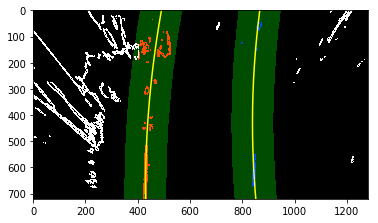

In [14]:
example_image2 = cv2.imread('./test_images/test5.jpg')
example_image2 = cv2.cvtColor(example_image2, cv2.COLOR_BGR2RGB)

mask2 = process_image(example_image2)

output_image, left_fit2, right_fit2, ploty2, left_lane_inds2, right_lane_inds2 =\
    polyfit_with_frames(mask2, left_fit, right_fit)
plt.imshow(output_image)
left_fitx2 = left_fit2[0]*ploty2**2 + left_fit2[1]*ploty2 + left_fit2[2]
right_fitx2 = right_fit2[0]*ploty2**2 + right_fit2[1]*ploty2 + right_fit2[2]
plt.plot(left_fitx2, ploty2, color='yellow')
plt.plot(right_fitx2, ploty2, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)


In [15]:
def curvature_radius_and_center_distance(mask, left_fit, right_fit, left_lane_inds, right_lane_inds):
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 3.048/100 # meters per pixel in y dimension, lane line is 10 ft = 3.048 meters
    xm_per_pix = 3.7/378 # meters per pixel in x dimension, lane width is 12 ft = 3.7 meters
    left_curverad, right_curverad, center_dist = (0, 0, 0)
    h = mask.shape[0]
    ploty = np.linspace(0, h-1, h)
    y_eval = np.max(ploty)
    nonzero = mask.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    if len(leftx) != 0 and len(rightx) != 0:
        # Fit new polynomials to x,y in world space
        left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
        right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
        # Calculate the new radii of curvature
        left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
        right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
        # Now our radius of curvature is in meters
    
    # Distance from center is image x midpoint - mean of l_fit and r_fit intercepts 
    if right_fit is not None and left_fit is not None:
        car_position = mask.shape[1]/2
        left_fit_x_int = left_fit[0]*h**2 + left_fit[1]*h + left_fit[2]
        right_fit_x_int = right_fit[0]*h**2 + right_fit[1]*h + right_fit[2]
        lane_center_position = (left_fit_x_int + right_fit_x_int) /2
        center_dist = (car_position - lane_center_position) * xm_per_pix
    return left_curverad, right_curverad, center_dist


In [16]:
left_radius, right_radius, center_distance = curvature_radius_and_center_distance(
    mask, left_fit, right_fit, left_lane_inds, right_lane_inds)

print('Radius of curvature for example1:', left_radius, 'm,', right_radius, 'm')
print('Distance from lane center for example1:', center_distance, 'm')

Radius of curvature for example1: 1321.15043304 m, 337.104989298 m
Distance from lane center for example1: -0.308679775006 m


In [17]:
def draw_lane(image, mask, l_fit, r_fit, Minv):
    new_image = image.copy()
    if left_fit is None or right_fit is None:
        return image
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(mask).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    h,w = mask.shape
    ploty = np.linspace(0, h-1, num=h)# to cover same y-range as image
    left_fitx = l_fit[0]*ploty**2 + l_fit[1]*ploty + l_fit[2]
    right_fitx = r_fit[0]*ploty**2 + r_fit[1]*ploty + r_fit[2]

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    cv2.polylines(color_warp, np.int32([pts_left]), isClosed=False, color=(255,0,255), thickness=15)
    cv2.polylines(color_warp, np.int32([pts_right]), isClosed=False, color=(0,255,255), thickness=15)

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (w, h)) 
    # Combine the result with the original image
    result = cv2.addWeighted(new_image, 1, newwarp, 0.5, 0)
    return result

True

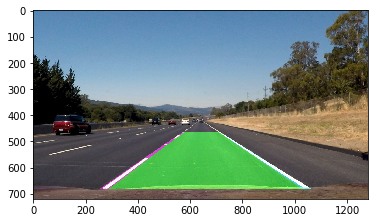

In [18]:
straight_lines2_image = cv2.imread('./test_images/straight_lines2.jpg')
straight_lines2_image = cv2.cvtColor(straight_lines2_image, cv2.COLOR_BGR2RGB)
straight_lines2_mask = process_image(straight_lines2_image)

straight_lines2_left_fit, straight_lines2_right_fit, straight_lines2_left_lane_inds,\
straight_lines2_right_lane_inds, straight_lines2_out_img, straight_lines2_nonzerox, straight_lines2_nonzeroy =\
polyfit(straight_lines2_mask)

plt.imshow(draw_lane(straight_lines2_image, straight_lines2_mask, straight_lines2_left_fit,
                     straight_lines2_right_fit, Minv))
cv2.imwrite("./output_images/final.jpg", cv2.cvtColor(draw_lane(straight_lines2_image, straight_lines2_mask, straight_lines2_left_fit,
                     straight_lines2_right_fit, Minv), cv2.COLOR_RGB2BGR))


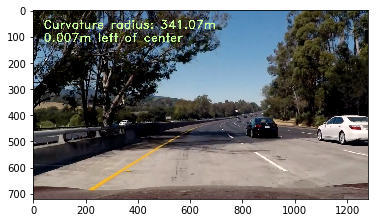

In [19]:
def draw_data(image, curvature_radius, center_distance):
    new_image = image.copy()
    h = new_image.shape[0]
    font = cv2.FONT_HERSHEY_DUPLEX
    text = 'Curvature radius: ' + '{:04.2f}'.format(curvature_radius) + 'm'
    cv2.putText(new_image, text, (40,70), font, 1.5, (200,255,155), 2, cv2.LINE_AA)
    direction = ''
    if center_distance > 0:
        direction = 'right'
    elif center_distance < 0:
        direction = 'left'
    abs_center_distance = abs(center_distance)
    text = '{:04.3f}'.format(abs_center_distance) + 'm ' + direction + ' of center'
    cv2.putText(new_image, text, (40,120), font, 1.5, (200,255,155), 2, cv2.LINE_AA)
    return new_image

example_image = cv2.imread('./test_images/test5.jpg')
example_image = cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB)

mask = process_image(example_image)

_, left_fit, right_fit, _, left_lane_inds, right_lane_inds =\
    polyfit_with_frames(mask2, left_fit, right_fit)
left_radius, right_radius, center_distance = curvature_radius_and_center_distance(
    mask, left_fit, right_fit, left_lane_inds, right_lane_inds)
plt.imshow(draw_data(example_image, (left_radius+right_radius)/2, center_distance))

In [20]:
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = []  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #number of detected pixels
        self.px_count = None
    def add_fit(self, fit, inds):
        # add a found fit to the line, up to n
        if fit is not None:
            if self.best_fit is not None:
                # if we have a best fit, see how this new fit compares
                self.diffs = abs(fit-self.best_fit)
            if (self.diffs[0] > 0.001 or \
               self.diffs[1] > 1.0 or \
               self.diffs[2] > 100.) and \
               len(self.current_fit) > 0:
                # bad fit! abort! abort! ... well, unless there are no fits in the current_fit queue, then we'll take it
                self.detected = False
            else:
                self.detected = True
                self.px_count = np.count_nonzero(inds)
                self.current_fit.append(fit)
                if len(self.current_fit) > 5:
                    # throw out old fits, keep newest n
                    self.current_fit = self.current_fit[len(self.current_fit)-5:]
                self.best_fit = np.average(self.current_fit, axis=0)
        # or remove one from the history, if not found
        else:
            self.detected = False
            if len(self.current_fit) > 0:
                # throw out oldest fit
                self.current_fit = self.current_fit[:len(self.current_fit)-1]
            if len(self.current_fit) > 0:
                # if there are still any fits in the queue, best_fit is their average
                self.best_fit = np.average(self.current_fit, axis=0)


class LaneDetector(object):
    def __init__(self):
        self.left_line = Line()
        self.right_line = Line()
        
    def detect_lanes(self, image):
        mask = process_image(image.copy())

        _, left_fit, right_fit, _, left_lane_inds, right_lane_inds =\
            polyfit_with_frames(mask, self.left_line.best_fit, self.right_line.best_fit)
        left_radius, right_radius, center_distance = curvature_radius_and_center_distance(
            mask, left_fit, right_fit, left_lane_inds, right_lane_inds)

        # invalidate both fits if the difference in their x-intercepts isn't around 350 px (+/- 100 px)
        if left_fit is not None and right_fit is not None:
            h = image.shape[0]
            left_fit_x_int = left_fit[0]*h**2 + left_fit[1]*h + left_fit[2]
            right_fit_x_int = right_fit[0]*h**2 + right_fit[1]*h + right_fit[2]
            x_int_diff = abs(right_fit_x_int - left_fit_x_int)
            if abs(350 - x_int_diff) > 100:
                left_fit = None
                right_fit = None

        self.left_line.add_fit(left_fit, left_lane_inds)
        self.right_line.add_fit(right_fit, right_lane_inds)

        if self.left_line.best_fit is not None and self.right_line.best_fit is not None:
            with_lanes = draw_lane(image.copy(), mask, self.left_line.best_fit, self.right_line.best_fit, Minv)
            left_radius, right_radius, center_distance = curvature_radius_and_center_distance(
                mask, self.left_line.best_fit, self.right_line.best_fit,
                left_lane_inds, right_lane_inds)
            output_image = draw_data(with_lanes, (left_radius + right_radius)/2, center_distance)
        else:
            output_image = image.copy()
        return output_image

In [21]:
lane_detector = LaneDetector()
processed_video = VideoFileClip('project_video.mp4').fl_image(lane_detector.detect_lanes)
%time processed_video.write_videofile('project_video_output.mp4', audio=False)

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|█████████▉| 1260/1261 [01:13<00:00, 16.70it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

CPU times: user 1min 36s, sys: 7.62 s, total: 1min 44s
Wall time: 1min 14s
